In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math

$$
\sin(\pi x)
$$



In [56]:
from keras.engine import training
loss_tracker = keras.metrics.Mean(name = 'loss')

# Modelo
class Funsol(Sequential):
  @property
  def metrics(self):
    return [loss_tracker]

  def train_step(self, data): # Paso de entrenamiento personalizado
    batch_size = 100 # Resolución
    x = tf.random.uniform((batch_size, 1), minval = -10, maxval = 10) # Generación de datos aleatorios entre -10 y 10
    f = 3. * tf.math.sin(np.pi * x) # Función
    
    with tf.GradientTape() as tape:
      y_pred = self(x, training = True) # Se calcula la predicción con los datos generados (x)
      loss = tf.math.reduce_mean(tf.math.square(y_pred - f)) # Pérdida MSE
    
    grads = tape.gradient(loss, self.trainable_weights) # Gradientes de la función de costo (loss) respecto a los pesos
    self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
    loss_tracker.update_state(loss)

    return {'loss': loss_tracker.result()} # DIccionario con loss_tracker

In [65]:
model = Funsol()

model.add(Dense(500, activation = 'tanh', input_shape = (1, )))
model.add(Dense(300, activation = 'tanh'))
model.add(Dense(100, activation = 'tanh'))
model.add(Dense(1))

model.summary()

Model: "funsol_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 500)               1000      
                                                                 
 dense_46 (Dense)            (None, 300)               150300    
                                                                 
 dense_47 (Dense)            (None, 100)               30100     
                                                                 
 dense_48 (Dense)            (None, 1)                 101       
                                                                 
Total params: 181,501
Trainable params: 181,501
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(optimizer = Adam(), metrics = ['loss'])
x = tf.linspace(-10, 10, 100)
history = model.fit(x, epochs = 10000, verbose = 0)

In [67]:
print(history.history.keys())

dict_keys(['loss'])


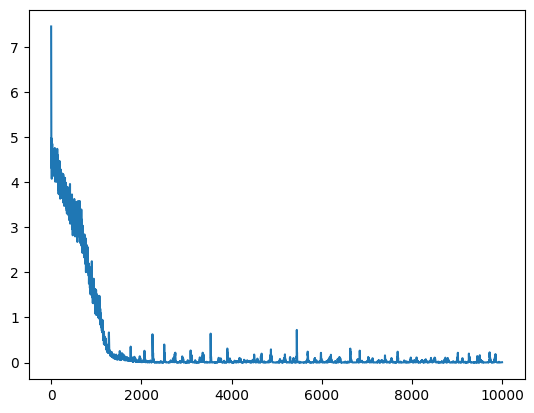

In [68]:
plt.plot(history.history["loss"])

In [69]:
a = model.predict(x)

4/4 [==============================] - 0s 2ms/step


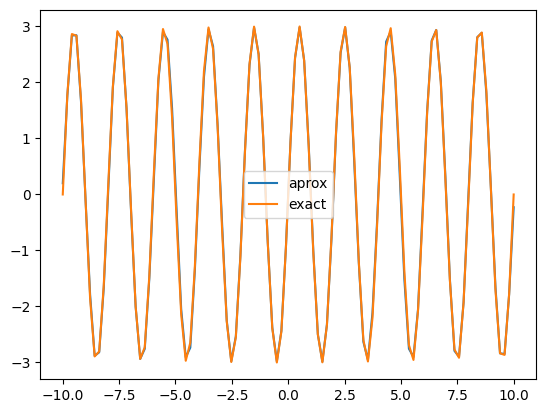

In [70]:
plt.plot(x,a,label="aprox")
plt.plot(x, 3. * tf.math.sin(np.pi * x), label="exact")
plt.legend()
plt.show()

$$
1 + 2x + 4x^3
$$

In [72]:
from keras.engine import training
loss_tracker = keras.metrics.Mean(name = 'loss')

# Modelo
class Funsol_1(Sequential):
  @property
  def metrics(self):
    return [loss_tracker]

  def train_step(self, data): # Paso de entrenamiento personalizado
    batch_size = 100 # Resolución
    x = tf.random.uniform((batch_size, 1), minval = -10, maxval = 10) # Generación de datos aleatorios entre -10 y 10
    f = 1. + 2.*x + 4.*x**3
    
    with tf.GradientTape() as tape:
      y_pred = self(x, training = True) # Se calcula la predicción con los datos generados (x)
      loss = tf.math.reduce_mean(tf.math.square(y_pred - f)) # Pérdida MSE
    
    grads = tape.gradient(loss, self.trainable_weights) # Gradientes de la función de costo (loss) respecto a los pesos
    self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
    loss_tracker.update_state(loss)

    return {'loss': loss_tracker.result()} # Diccionario con loss_tracker

In [73]:
model = Funsol_1()

model.add(Dense(500, activation = 'tanh', input_shape = (1, )))
model.add(Dense(300, activation = 'tanh'))
model.add(Dense(100, activation = 'tanh'))
model.add(Dense(1))

model.summary()

Model: "funsol_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 500)               1000      
                                                                 
 dense_50 (Dense)            (None, 300)               150300    
                                                                 
 dense_51 (Dense)            (None, 100)               30100     
                                                                 
 dense_52 (Dense)            (None, 1)                 101       
                                                                 
Total params: 181,501
Trainable params: 181,501
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(optimizer = Adam(), metrics = ['loss'])
x = tf.linspace(-10, 10, 100)
history = model.fit(x, epochs = 12000, verbose = 0)

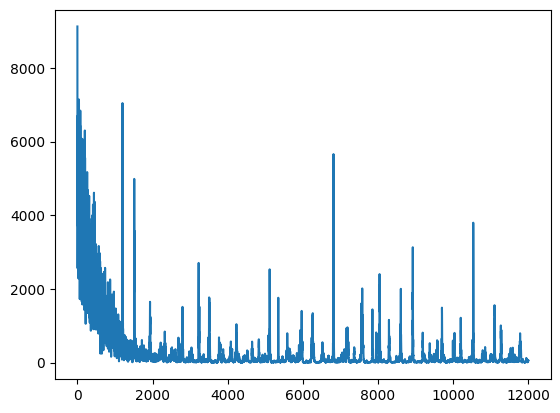

In [78]:
plt.plot(history.history["loss"])

4/4 [==============================] - 0s 2ms/step


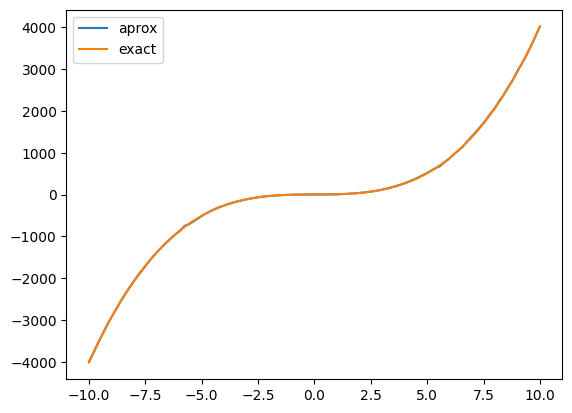

In [79]:
a = model.predict(x)
plt.plot(x,a,label="aprox")
plt.plot(x, 1. + 2.*x + 4.*x**3, label="exact")
plt.legend()
plt.show()